## Importing libraries and data set

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
#importing data set
df_1 = pd.read_csv('Training-Data-Sets - NEWDATA.csv')

In [6]:
df_1.head()

,s.no,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [7]:
df_1.shape

(12000, 39)

In [8]:
df_1.isna().sum()

s.no                                  0
EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0


- the data has no null value

## EDA

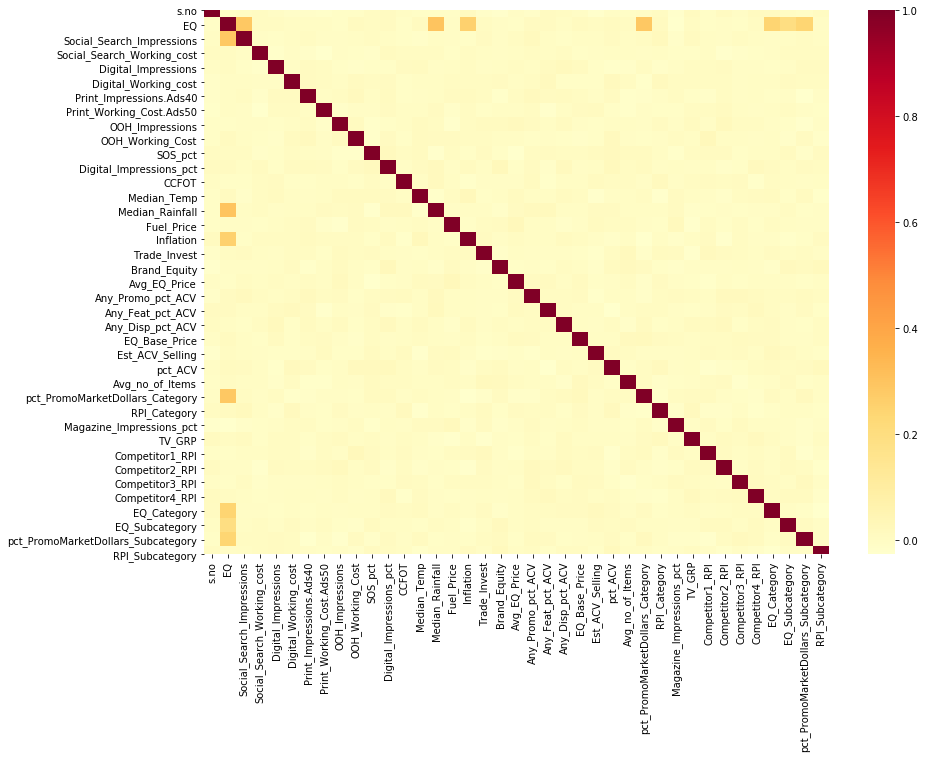

In [9]:
# correlation heat map
plt.figure(figsize=(14,10))
sns.heatmap(df_1.corr(), annot=False,cmap='YlOrRd')
plt.show()

- it can be seen from the correlation heatmap that the variables are mostly independent of each other
- So, there is no need for variable elemination or PCA as of now

Now , let us see the distribution of EQ (dependent variable)

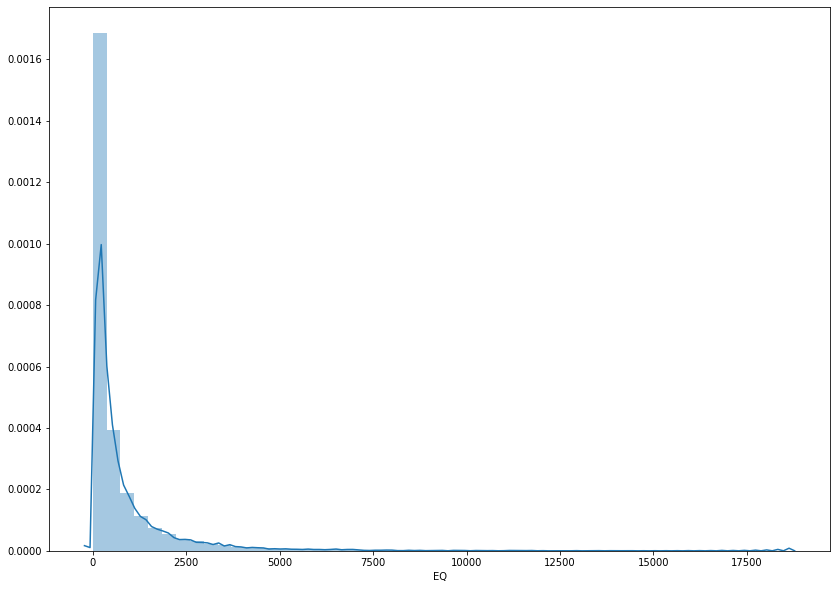

In [10]:
plt.figure(figsize=(14,10))
sns.distplot(df_1['EQ'])
plt.show()

- most of the sales values are near the lower region

## Outlier treatment

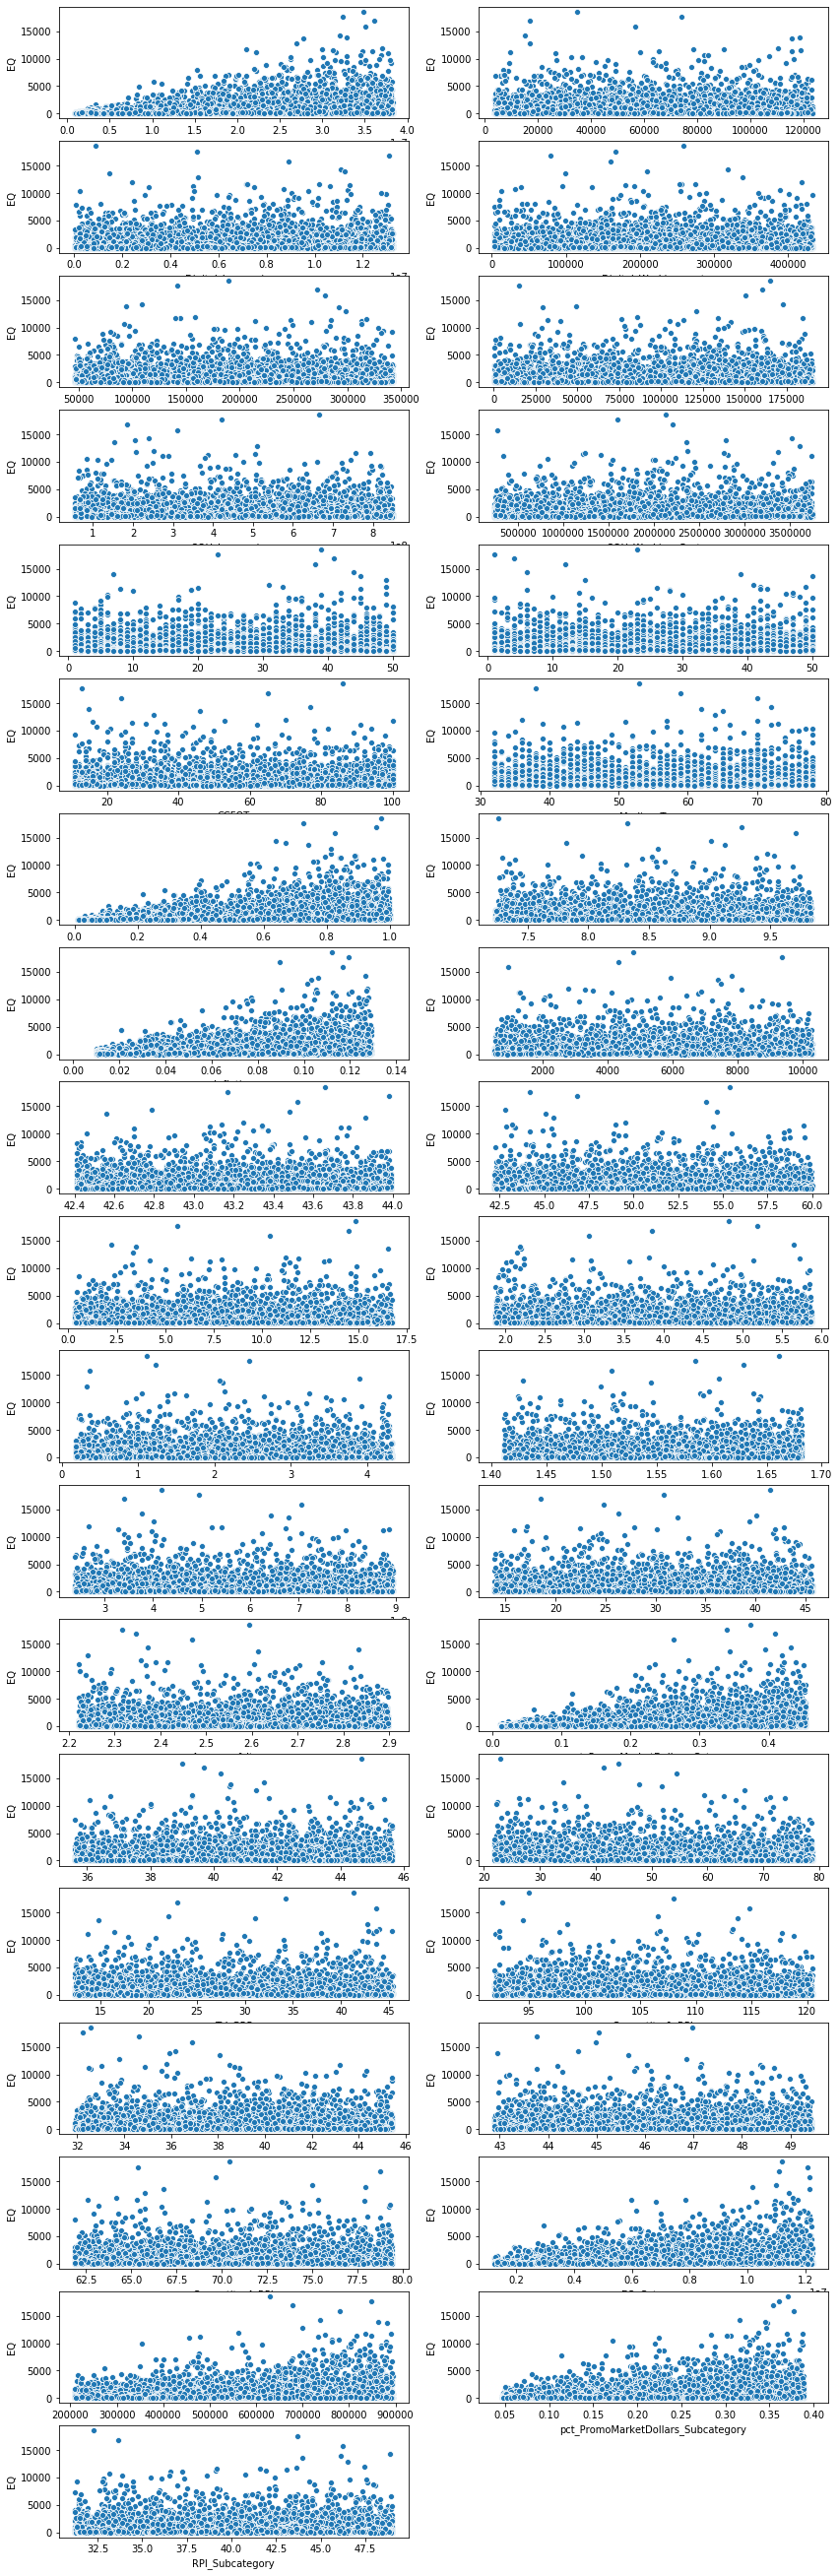

In [11]:
cols=df_1.columns
cols=cols.drop(['EQ','s.no'])
dataFrame = df_1
fig = plt.figure(figsize=(14,100))

for i in range(0,len(cols)):
    plt.subplot(40, 2, i+1)
    sns.scatterplot(x=cols[i],y='EQ',legend='full',data=dataFrame)

- from this we can not identify any outlier
- but let us check once more with some other method

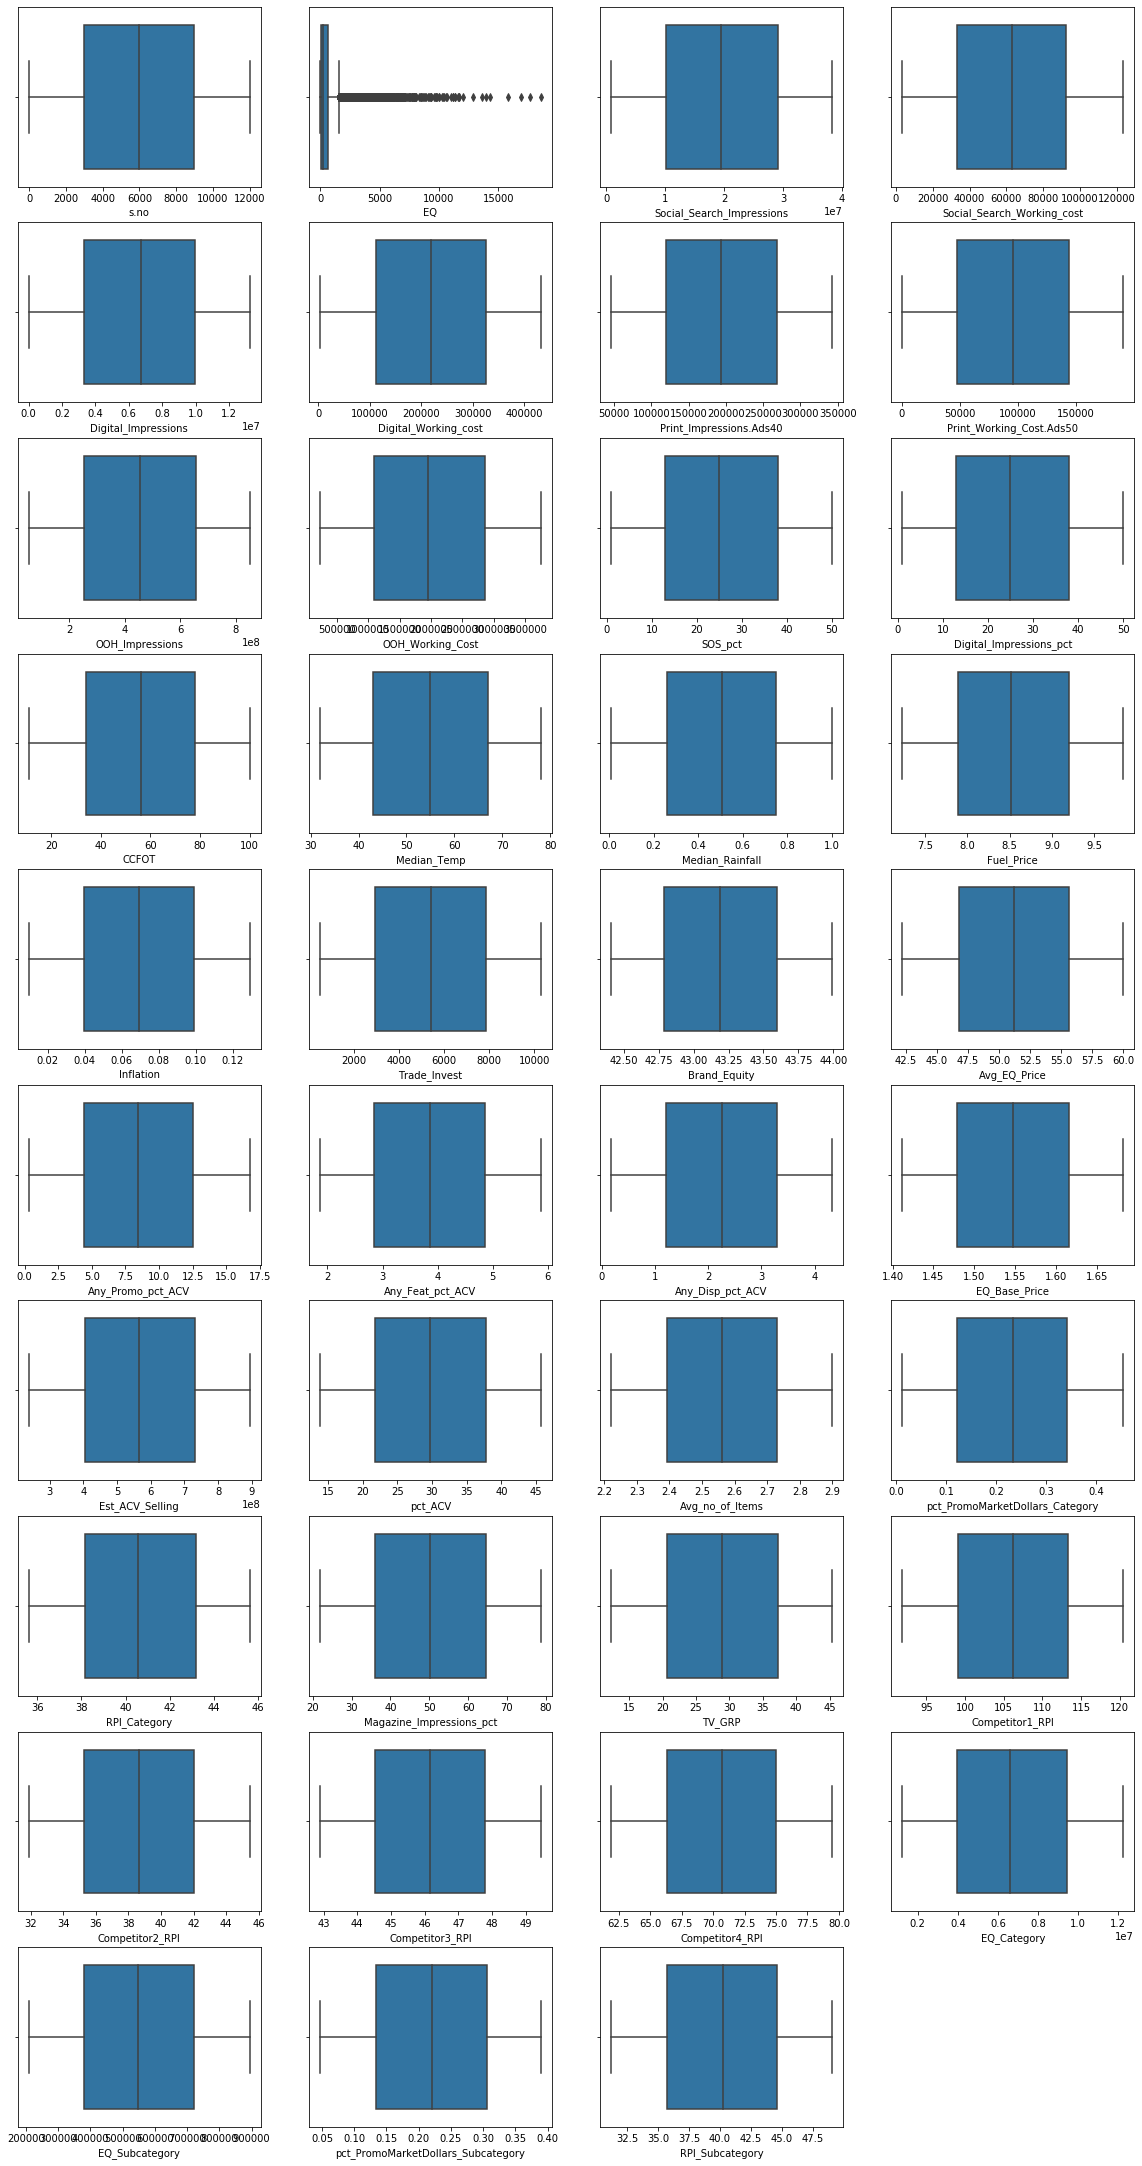

In [12]:
# box plot
def box_plot(df):
#Function to plot the distribution plot of the numeric variable list
    var_list = list(df.columns)
    plt.figure(figsize=(20, 4*len(var_list)//4))
    for var in var_list:
        plt.subplot(len(var_list)//4+1,4,var_list.index(var)+1)
        sns.boxplot(df[var])
    plt.show()
    
box_plot(df_1)

- now we can conclude that there are no outliers, se we do not need to perform outlier treatment

## Train test split

In [13]:
# dlicing the data set into X and y
y = df_1.pop('EQ')
X = df_1.copy()

In [14]:
X = X.drop(['s.no'],axis=1)
X.head()

,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = list(X.columns)
X[cols] = scaler.fit_transform(X[cols])
X.head()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

## XG Boost

In [17]:
import xgboost
classifier=xgboost.XGBRegressor()

In [18]:
import xgboost
regressor=xgboost.XGBRegressor()

In [19]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [20]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [21]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.1min


In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
#storing the model in pickle file
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# predicting y values using the model
y_pred=regressor.predict(X)

In [ ]:
y_pred

In [ ]:
# creating data frame from predicted data
z=pd.DataFrame(y_pred)
z.rename(columns={0:'EQ_pred'}, inplace=True)

In [ ]:
z.head()